# Practical 3 -

[Nasser-eddine Monir](https://nasseredd.github.io/teaching/) (CC BY-NC-SA) -- 2025


* 👥 You may work in pairs,
* 📩 however, submit your work individually by the end of the class.
* 📝 Your names should be included in the file names as follows: **Practical-3-Monir.ipynb**.
* 📧 Please ensure you email me EXCLUSIVELY at the following address: nasser-eddine.monir@inria.fr
* 💬 Don't forget to leave a comment whenever an observation is requested.

# First Steps

1. Change the run time and choose a **T4 GPU**.
2. Click on "Upload to session storage" button to load ```data.zip```.
3. Unzip the folder ```!unzip /content/data.zip -d /content/data```

In [1]:
# TODO: code me!
!unzip /content/data.zip -d /content/data

Archive:  /content/data.zip
   creating: /content/data/data/
  inflating: /content/data/__MACOSX/._data  
  inflating: /content/data/data/.DS_Store  
  inflating: /content/data/__MACOSX/data/._.DS_Store  
   creating: /content/data/data/speech/
  inflating: /content/data/__MACOSX/data/._speech  
   creating: /content/data/data/rir/
  inflating: /content/data/__MACOSX/data/._rir  
   creating: /content/data/data/noise/
  inflating: /content/data/__MACOSX/data/._noise  
  inflating: /content/data/data/speech/652-130726-0010.wav  
  inflating: /content/data/__MACOSX/data/speech/._652-130726-0010.wav  
  inflating: /content/data/data/speech/777-126732-0056.wav  
  inflating: /content/data/__MACOSX/data/speech/._777-126732-0056.wav  
  inflating: /content/data/data/speech/251-137823-0023.wav  
  inflating: /content/data/__MACOSX/data/speech/._251-137823-0023.wav  
  inflating: /content/data/data/speech/3170-137482-0045.wav  
  inflating: /content/data/__MACOSX/data/speech/._3170-137482-0045

4. Install ```museval``` using ```pip```.

In [2]:
# TODO: code me!
%pip install museval -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.7/144.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.5/963.5 kB 20.5 MB/s eta 0:00:00


5. Install these packages

In [3]:
%pip install git+https://github.com/espnet/espnet
%pip install -q espnet_model_zoo

  Cloning https://github.com/espnet/espnet to /tmp/pip-req-build-tru8qatc
  Running command git clone --filter=blob:none --quiet https://github.com/espnet/espnet /tmp/pip-req-build-tru8qatc
  Resolved https://github.com/espnet/espnet to commit b57dd0418ab2f7a03a21239f70decb9837cb2b0f
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 7.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 14.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metada

In [4]:
%pip install flash_attn -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 66.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


# Imports

In [5]:
import sys
import librosa
import soundfile
import numpy as np
import seaborn as sns
import soundfile as sf
import matplotlib.pyplot as plt
from espnet2.bin.enh_inference import SeparateSpeech
from espnet_model_zoo.downloader import ModelDownloader

/usr/local/lib/python3.11/dist-packages/espnet2/enh/loss/criterions/time_domain.py:446: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)
/usr/local/lib/python3.11/dist-packages/espnet2/enh/layers/tcn.py:458: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)
/usr/local/lib/python3.11/dist-packages/espnet2/enh/layers/tcn.py:499: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)
/usr/local/lib/python3.11/dist-packages/espnet2/enh/layers/bsrnn.py:290: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)
/usr/local/lib/python3.11/dist-packag

#### Load Signals

This function, ```load_signals```, is designed to load and return speech, noise, and their corresponding Room Impulse Responses (RIRs).

In [6]:
def load_signals(speech_file, noise_file, speech_rir_file, noise_rir_file):
    # Load the speech signal
    speech_signal, _ = librosa.load(speech_file, sr=16000)

    # Load the noise signal
    noise_signal, _ = librosa.load(noise_file, sr=16000)

    # Load the RIRs
    speech_rir_data = np.load(speech_rir_file)
    noise_rir_data = np.load(noise_rir_file)

    # Extract the RIR signals
    speech_rir = speech_rir_data['phl_left_front']
    noise_rir = noise_rir_data['phl_left_front']

    return speech_signal, noise_signal, speech_rir, noise_rir

#### Mixture

Create mixtures by assigning a unique noise signal to each speech signal while maintaining the following conditions:

- Speech Position: Always at the front (0°).
- Noise Position: Always at 90° to the right.
- Signal-to-Noise Ratio (SNR): Fixed at 0 dB.

Ensure that each speech signal is paired with exactly one noise signal, resulting in distinct mixtures.

In [7]:
# TODO: code me!
import glob
from scipy.signal import convolve
from IPython.display import Audio
from collections import deque

data_directory = "/content/data/data"

speech_files = glob.glob(data_directory + "/speech/*.wav")
noise_files = glob.glob(data_directory + "/noise/*.wav")
rir_files = glob.glob(data_directory + "/rir/*.npz")

print(f"First 5 speech files from {len(speech_files)}",)
print(speech_files[:5])
print(f"\nFirst 5 noise files from {len(noise_files)}")
print(noise_files[:5])
print("\n Rir files:")
rir_files = sorted(rir_files)
print(rir_files)

First 5 speech files from 95
['/content/data/data/speech/3576-138058-0038.wav', '/content/data/data/speech/2412-153954-0003.wav', '/content/data/data/speech/2412-153954-0004.wav', '/content/data/data/speech/652-130726-0007.wav', '/content/data/data/speech/1462-170142-0009.wav']

First 5 noise files from 96
['/content/data/data/noise/printer_234440_3.wav', '/content/data/data/noise/water_344358.wav', '/content/data/data/noise/washing_machine_243637_120.wav', '/content/data/data/noise/washing_machine_243637_104.wav', '/content/data/data/noise/fan_63131_2.wav']

 Rir files:
['/content/data/data/rir/rir_spkr1.npz', '/content/data/data/rir/rir_spkr3.npz', '/content/data/data/rir/rir_spkr4.npz', '/content/data/data/rir/rir_spkr5.npz']


In [8]:
def normalize_signal(signal):
    max_amplitude = np.max(np.abs(signal))
    if max_amplitude == 0:
        return signal
    return signal / max_amplitude

In [9]:
def compute_gain(speech_signal, noise_signal, SNR_dB):
    P_s = np.mean(speech_signal ** 2) # Compute the power of the speech signal (P_s)
    P_n = np.mean(noise_signal ** 2) # Compute the power of the noise signal (P_n)
    alpha = np.sqrt(P_s / (P_n * 10 ** (SNR_dB / 10))) # Compute the gain alpha
    return alpha

In [10]:
def create_mixture(speech_path, noise_path, speech_rir_path, noise_rir_path):

    speech_signal, noise_signal, speech_rir, noise_rir = load_signals(speech_path, noise_path, speech_rir_path, noise_rir_path)

    normalized_speech_signal = normalize_signal(speech_signal)

    normalized_noise_signal = normalize_signal(noise_signal)

    gain = compute_gain(normalized_speech_signal, normalized_noise_signal, SNR_dB=0)

    # scale the noise signal by the computed gain
    scaled_noise_signal = gain * normalized_noise_signal

    convolved_speech_signal = convolve(normalized_speech_signal, speech_rir)

    convolved_noise_signal = convolve(scaled_noise_signal, noise_rir)

    if len(convolved_speech_signal) > len(convolved_noise_signal):
        convolved_speech_signal = convolved_speech_signal[:len(convolved_noise_signal)]
    else:
        convolved_noise_signal = convolved_noise_signal[:len(convolved_speech_signal)]

    mixture = convolved_speech_signal + convolved_noise_signal

    return mixture

In [11]:
mixture_list = deque()

mixture_directory = data_directory + "/mixture"

!mkdir -p $mixture_directory


for index, item in enumerate(speech_files):
  mixture = create_mixture(
    item,
    noise_files[index],
    rir_files[1],
    rir_files[3]
  )
  mixture_list.append(mixture)
  sf.write(f"{mixture_directory}/mixture_{index}.wav", mixture, 16000)

print(f"Number of mixtures: {len(mixture_list)}")
Audio(mixture_list[0], rate=16000)

Number of mixtures: 95


# Speech Enhancement

The next three cells are from the ESPnet tutorial on speech enhancement algorithms, available on their [GitHub repository](https://github.com/espnet/espnet). It offers four pretrained models, including MVDR and FaSNet. Choose one, run the cells carefully, then visualize and listen to the generated mixture and estimated speech.

The models processe a **four-channel mixture**, selects a **reference channel**, and outputs a **single-channel estimated speech**.

In [12]:
fs = 16000 #@param {type:"integer"}
tag = "lichenda/chime4_fasnet_dprnn_tac" #@param ["espnet/Wangyou_Zhang_chime4_enh_train_enh_beamformer_mvdr_raw", "espnet/Wangyou_Zhang_chime4_enh_train_enh_dc_crn_mapping_snr_raw", "lichenda/chime4_fasnet_dprnn_tac", "https://zenodo.org/record/6025881/files/enh_train_enh_beamformer_mvdr_raw_valid.si_snr.ave.zip"]

In [13]:
d = ModelDownloader()

cfg = d.download_and_unpack(tag)
enh_model_mc = SeparateSpeech(
  train_config=cfg["train_config"],
  model_file=cfg["model_file"],
  normalize_segment_scale=False,
  show_progressbar=True,
  ref_channel=4,
  normalize_output_wav=True,
  device="cuda:0",
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)nntac_fasnet_raw/images/forward_time.png:   0%|          | 0.00/56.9k [00:00<?, ?B/s]

(…)rain_enh_dprnntac_fasnet_raw/config.yaml:   0%|          | 0.00/3.02k [00:00<?, ?B/s]

(…)ntac_fasnet_raw/images/backward_time.png:   0%|          | 0.00/63.5k [00:00<?, ?B/s]

(…)train_enh_dprnntac_fasnet_raw/RESULTS.md:   0%|          | 0.00/605 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.99k [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

exp/enh_stats_16k/train/feats_stats.npz:   0%|          | 0.00/802 [00:00<?, ?B/s]

59epoch.pth:   0%|          | 0.00/16.4M [00:00<?, ?B/s]

(…)dprnntac_fasnet_raw/images/iter_time.png:   0%|          | 0.00/38.7k [00:00<?, ?B/s]

(…)net_raw/images/gpu_max_cached_mem_GB.png:   0%|          | 0.00/34.7k [00:00<?, ?B/s]

(…)_enh_dprnntac_fasnet_raw/images/loss.png:   0%|          | 0.00/33.6k [00:00<?, ?B/s]

(…)ac_fasnet_raw/images/optim_step_time.png:   0%|          | 0.00/51.2k [00:00<?, ?B/s]

(…)rnntac_fasnet_raw/images/si_snr_loss.png:   0%|          | 0.00/34.7k [00:00<?, ?B/s]

(…)prnntac_fasnet_raw/images/train_time.png:   0%|          | 0.00/51.5k [00:00<?, ?B/s]

(…)prnntac_fasnet_raw/images/optim0_lr0.png:   0%|          | 0.00/32.9k [00:00<?, ?B/s]

meta.yaml:   0%|          | 0.00/272 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/espnet2/tasks/abs_task.py:2348: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(model_file, map_location=device),


In [14]:
!gdown --id 1SmrN5NFSg6JuQSs2sfy3ehD8OIcqK6wS -O /content/M05_440C0213_PED_REAL.wav
mixwav_mc, sr = soundfile.read("/content/M05_440C0213_PED_REAL.wav") # mixwav.shape: num_samples, num_channels
mixwav_sc = mixwav_mc[:,4]
wave = enh_model_mc(mixwav_mc[None, ...], sr)

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1SmrN5NFSg6JuQSs2sfy3ehD8OIcqK6wS
To: /content/M05_440C0213_PED_REAL.wav
100% 932k/932k [00:00<00:00, 73.5MB/s]


In [15]:
Audio(wave[0], rate=16000)

Select a model and use it to generate the estimated speech from the chosen mixture. Once processed, listen to the output to evaluate the quality of the enhanced speech.

In [16]:
print(mixwav_mc[None, ...].shape)
print(mixwav_sc.shape)

(1, 93181, 5)
(93181,)


In [17]:
print(mixture_list[0][None, ...].shape)

(1, 158495)


In [18]:
selected_mixture = mixture_list[0]

# Reshape selected_mixture to have 4 channels
selected_mixture = np.tile(selected_mixture[:, np.newaxis], (1, 4))

print(selected_mixture.shape)

print(selected_mixture[None, ...].shape)
# Generate the estimated speech using the selected model
estimated_speech = enh_model_mc(selected_mixture[None, ...], 16000)

Audio(estimated_speech[0], rate=16000)


(158495, 4)
(1, 158495, 4)


Now that you're more familiar with speech enhancement using ESPnet, create a function that processes a given **mixture folder**, selects the **first channel as the reference**, and generates the **estimated speech** in the `est_speech/` folder using FaSNet.

In [19]:
# TODO: code me!
def inference():
  mixture_files = glob.glob(data_directory + "/mixture/*.wav")
  for index, item in enumerate(mixture_files):
      mixture, sr = soundfile.read(item)
      mixture = np.tile(mixture[:, np.newaxis], (1, 4))
      estimated_speech = enh_model_mc(mixture[None, ...], sr)

      est_speech_directory = data_directory + "/est_speech"

      !mkdir -p $est_speech_directory
      soundfile.write(f"{est_speech_directory}/est_speech_{index}.wav", estimated_speech[0][0], 16000)

inference()

# Evaluation

Museval is a library for evaluating speech enhancement models by computing key performance metrics such as SDR, SIR, and SAR.

In speech enhancement, we evaluate the estimated speech by comparing it to the clean reference and noise. Your task is to stack the **reference sources** (clean speech and noise) and the corresponding **estimates** as follows:

Given:
- **$s$** = clean speech (target signal)
- **$n$** = noise
- **$ \hat{s} $** = estimated speech

Stack the reference sources and estimates as:

$\text{references} = \begin{bmatrix}
s \\
n
\end{bmatrix}$

$
\text{estimates} =
\begin{bmatrix}
\hat{s} \\
\hat{s} - s
\end{bmatrix}$

Next, use the `bss_eval` function from `museval.metrics` to compute the enhancement metrics.  
Set `filters_len=1` to ensure proper evaluation.  

Run the evaluation on **one example of your choice**, print SIR, SAR and SDR, and analyze the results.

In [20]:
# TODO: code me!
from museval.metrics import bss_eval

# Load the reference signals (clean speech and noise)
s, n, _, _ = load_signals(speech_files[0], noise_files[0], rir_files[1], rir_files[3])

In [21]:
# Signal
Audio(s, rate=16000)

In [22]:
# Mixture
Audio(mixture_list[0], rate=16000)

In [23]:
# S hat
s_hat = estimated_speech[0]

Audio(s_hat, rate=16000)

In [24]:


# Load the estimated speech
estimated_speech_file = data_directory + "/est_speech/est_speech_0.wav"


# Stack the reference sources
references = np.vstack([s, n[:len(s)]])

s_hat = s_hat[0, :len(s)]

# Stack the estimates
estimates = np.vstack([s_hat, s_hat - s])

# Compute the evaluation metrics
(sdr, isr, sir, sar, perm) = bss_eval(references, estimates, compute_permutation=True, filters_len=1)

print("SIR:", sir[0][0])
print("SAR:", sar[0][0])
print("SDR:", sdr[0][0])

SIR: 27.04009471798483
SAR: 3.5006461564149176
SDR: -8.575168976172737


In [25]:
# Comment
# SIR: 27.04009471798483 -  Indicates a large improvement in the separation of the target speech from the interfering noise.
# SAR: 3.5006461564149176 - A positive SAR value is desirable, as it indicates that the noise reduction process
#                           did not introduce significant artifacts or distortion into the target signal.
# SDR: -8.575168976172737 - Low SDR indicates that the estimated speech still contains a considerable amount of noise.

# Overall, the results suggest that the separation process improved the signal to interference ratio, but not the overall signal quality.

* **Signal-to-Interference Ratio** (**SIR**) measures how well the target speech signal is separated from interfering noise or other unwanted sources. A higher SIR indicates better suppression of interference while preserving the target speech signal.

* **Signal-to-Artifacts Ratio** (**SAR**) quantifies the amount of distortion or artifacts introduced during signal processing. A higher SAR means fewer processing artifacts, ensuring the recovered signal remains natural and undistorted.

* **Signal-to-Distortion Ratio** (**SDR**) is an overall measure of signal quality that combines interference suppression and artifact minimization. A higher SDR indicates a better-quality reconstructed signal, balancing both interference removal and minimal processing distortions.

Overlay the spectrums of the speech signal, the noisy mixture, and the estimated speech on the same plot using three distinct colors. This visualization will help compare the spectral differences and assess the effectiveness of the enhancement process.

**Note**: Ensure that frequencies and magnitudes are clamped within the range of 50 to 5000 Hz to focus on the most relevant speech frequencies. Additionally, display both the x-axis (frequency) and y-axis (magnitude) in logarithmic scale for better visualization of spectral variations.

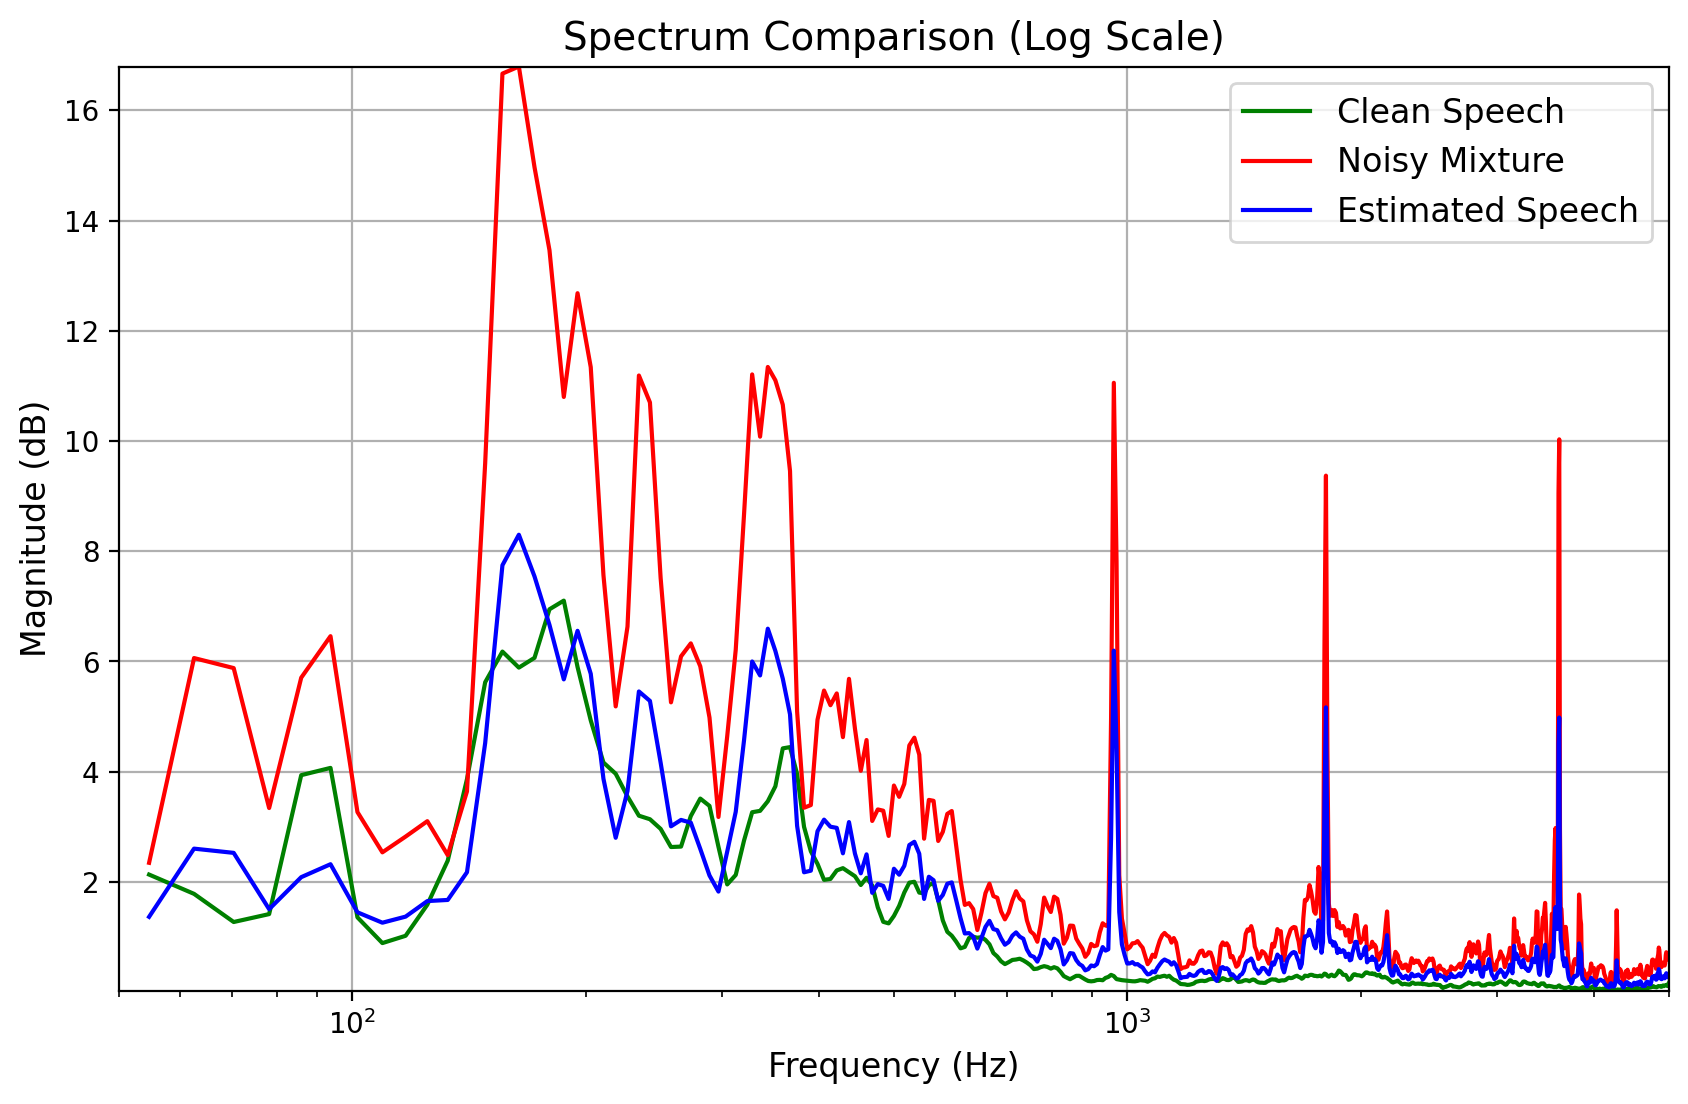

In [26]:
# TODO: code me!
import matplotlib.pyplot as plt


# Compute the spectrograms
s_stft = np.abs(librosa.stft(s))
mixture_stft = np.abs(librosa.stft(mixture_list[0]))
s_hat_stft = np.abs(librosa.stft(s_hat))

# Define frequency range
min_freq = 50
max_freq = 5000

# Extract relevant frequency bins
freqs = librosa.fft_frequencies(sr=16000)
freq_mask = (freqs >= min_freq) & (freqs <= max_freq)

# Calculate mean magnitude across time for each signal in the frequency range
s_mag = np.mean(s_stft[freq_mask, :], axis=1)
mixture_mag = np.mean(mixture_stft[freq_mask, :], axis=1)
s_hat_mag = np.mean(s_hat_stft[freq_mask, :], axis=1)


# Plot the spectrums on a logarithmic scale
plt.figure(figsize=(10, 6))

plt.semilogx(freqs[freq_mask], s_mag, label='Clean Speech', color='green')
plt.semilogx(freqs[freq_mask], mixture_mag, label='Noisy Mixture', color='red')
plt.semilogx(freqs[freq_mask], s_hat_mag, label='Estimated Speech', color='blue')

plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Magnitude (dB)', fontsize=12)
plt.title('Spectrum Comparison (Log Scale)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xlim(min_freq, max_freq)
plt.ylim(np.min([np.min(s_mag),np.min(mixture_mag), np.min(s_hat_mag)]), np.max([np.max(s_mag), np.max(mixture_mag), np.max(s_hat_mag)]))
plt.show()


Compute the average values of SIR, SAR, and SDR across the entire corpus to evaluate the overall performance of the separation system. This will provide a global assessment of interference suppression, artifact reduction, and signal quality across all samples.

In [27]:
# TODO: code me!
sir_values = []
sar_values = []
sdr_values = []

for i in range(len(mixture_list)):
    # Load the reference signals (clean speech and noise)
    s, n, _, _ = load_signals(speech_files[i], noise_files[i], rir_files[1], rir_files[3])

    # Load the estimated speech
    estimated_speech_file = data_directory + f"/est_speech/est_speech_{i}.wav"
    s_hat, _ = librosa.load(estimated_speech_file, sr=16000)

    # Ensure consistent lengths
    min_len = min(len(s), len(n), len(s_hat))
    s = s[:min_len]
    n = n[:min_len]
    s_hat = s_hat[:min_len]

    # Stack the reference sources
    references = np.vstack([s, n])

    # Stack the estimates
    estimates = np.vstack([s_hat, s_hat - s])

    # Compute the evaluation metrics
    (sdr, isr, sir, sar, perm) = bss_eval(references, estimates, compute_permutation=True, filters_len=1)

    # Append the values to the respective lists
    sir_values.append(sir[0][0])
    sar_values.append(sar[0][0])
    sdr_values.append(sdr[0][0])

# Compute the average values
avg_sir = np.mean(sir_values)
avg_sar = np.mean(sar_values)
avg_sdr = np.mean(sdr_values)

print(f"Average SIR: {avg_sir}")
print(f"Average SAR: {avg_sar}")
print(f"Average SDR: {avg_sdr}")




Average SIR: 41.55416587214443
Average SAR: -5.4646944692786255
Average SDR: -9.39048176317296


Select the MVDR model to generate inferences on the same set of mixtures. Compute the evaluation metrics (SIR, SAR, SDR) and compare the results with the previous estimations obtained using the FaSNet model to assess their relative performance.

In [28]:
# Download and initialize the MVDR model
# tag_mvdr = "https://zenodo.org/record/6025881/files/enh_train_enh_beamformer_mvdr_raw_valid.si_snr.ave.zip"
tag_mvdr = "espnet/Wangyou_Zhang_chime4_enh_train_enh_beamformer_mvdr_raw"
d_mvdr = ModelDownloader()
cfg_mvdr = d_mvdr.download_and_unpack(tag_mvdr)
enh_model_mvdr = SeparateSpeech(
    train_config=cfg_mvdr["train_config"],
    model_file=cfg_mvdr["model_file"],
    normalize_segment_scale=False,
    show_progressbar=True,
    ref_channel=3, # Updated to 3 ref channels as it is 0 indexed and we use 4 channels
    normalize_output_wav=True,
    device="cuda:0",
)

# Function to perform inference with MVDR and compute metrics
def inference_mvdr_and_evaluate():
    sir_values_mvdr = []
    sar_values_mvdr = []
    sdr_values_mvdr = []

    est_speech_mvdr_directory = data_directory + "/est_speech_mvdr"  # Separate directory for MVDR output
    !mkdir -p $est_speech_mvdr_directory

    for i in range(len(mixture_list)):
        mixture = np.tile(mixture_list[i][:, np.newaxis], (1, 4))  # Reshape mixture to have 4 channels

        # Generate the estimated speech using the MVDR model
        estimated_speech_mvdr = enh_model_mvdr(mixture[None, ...], 16000)

        # Save the estimated speech
        soundfile.write(f"{est_speech_mvdr_directory}/est_speech_{i}.wav", estimated_speech_mvdr[0][0], 16000)

        # Load reference signals
        s, n, _, _ = load_signals(speech_files[i], noise_files[i], rir_files[1], rir_files[3])

        # Ensure consistent lengths
        min_len = min(len(s), len(n), len(estimated_speech_mvdr[0][0]))
        s = s[:min_len]
        n = n[:min_len]
        s_hat_mvdr = estimated_speech_mvdr[0][0][:min_len]


        references = np.vstack([s, n])
        estimates = np.vstack([s_hat_mvdr, s_hat_mvdr - s])
        (sdr, isr, sir, sar, perm) = bss_eval(references, estimates, compute_permutation=True, filters_len=1)

        sir_values_mvdr.append(sir[0][0])
        sar_values_mvdr.append(sar[0][0])
        sdr_values_mvdr.append(sdr[0][0])

    avg_sir_mvdr = np.mean(sir_values_mvdr)
    avg_sar_mvdr = np.mean(sar_values_mvdr)
    avg_sdr_mvdr = np.mean(sdr_values_mvdr)

    print(f"MVDR - Average SIR: {avg_sir_mvdr}")
    print(f"MVDR - Average SAR: {avg_sar_mvdr}")
    print(f"MVDR - Average SDR: {avg_sdr_mvdr}")

    return avg_sir_mvdr, avg_sar_mvdr, avg_sdr_mvdr


# Run the inference and evaluation for MVDR
avg_sir_mvdr, avg_sar_mvdr, avg_sdr_mvdr = inference_mvdr_and_evaluate()

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

11epoch.pth:   0%|          | 0.00/53.6M [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.74k [00:00<?, ?B/s]

(…)mformer_mvdr_raw/images/forward_time.png:   0%|          | 0.00/38.0k [00:00<?, ?B/s]

exp/enh_stats_16k/train/feats_stats.npz:   0%|          | 0.00/742 [00:00<?, ?B/s]

(…)former_mvdr_raw/images/backward_time.png:   0%|          | 0.00/31.7k [00:00<?, ?B/s]

(…)rain_enh_beamformer_mvdr_raw/RESULTS.TXT:   0%|          | 0.00/711 [00:00<?, ?B/s]

(…)rain_enh_beamformer_mvdr_raw/config.yaml:   0%|          | 0.00/3.26k [00:00<?, ?B/s]

(…)beamformer_mvdr_raw/images/iter_time.png:   0%|          | 0.00/46.7k [00:00<?, ?B/s]

(…)_enh_beamformer_mvdr_raw/images/loss.png:   0%|          | 0.00/32.2k [00:00<?, ?B/s]

(…)eamformer_mvdr_raw/images/train_time.png:   0%|          | 0.00/40.1k [00:00<?, ?B/s]

(…)_enh_beamformer_mvdr_raw/images/lr_0.png:   0%|          | 0.00/24.7k [00:00<?, ?B/s]

(…)rmer_mvdr_raw/images/optim_step_time.png:   0%|          | 0.00/50.4k [00:00<?, ?B/s]

(…)nh_beamformer_mvdr_raw/images/si_snr.png:   0%|          | 0.00/26.1k [00:00<?, ?B/s]

meta.yaml:   0%|          | 0.00/285 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/espnet2/tasks/abs_task.py:2348: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(model_file, map_location=device),


MVDR - Average SIR: 20.28927820113227
MVDR - Average SAR: -3.8152250364266562
MVDR - Average SDR: -9.725750736845432


In [29]:

# Compare with FaSNet results (assuming you have these stored in variables)
print("\nComparison:")
print(f"SIR Improvement (MVDR {avg_sir_mvdr} - FaSNet {avg_sir}) Difference is: {avg_sir_mvdr - avg_sir}")
print(f"SAR Improvement (MVDR {avg_sar_mvdr} - FaSNet {avg_sar}) Difference is: {avg_sar_mvdr - avg_sar}")
print(f"SDR Improvement (MVDR {avg_sdr_mvdr} - FaSNet {avg_sdr}) Difference is: {avg_sdr_mvdr - avg_sdr}")



Comparison:
SIR Improvement (MVDR 20.28927820113227 - FaSNet 41.55416587214443) Difference is: -21.26488767101216
SAR Improvement (MVDR -3.8152250364266562 - FaSNet -5.4646944692786255) Difference is: 1.6494694328519692
SDR Improvement (MVDR -9.725750736845432 - FaSNet -9.39048176317296) Difference is: -0.33526897367247166


# Bonus (+3pts on Your Practicals Grade)

This part is optional and can be done at home until Friday, February 13th, at 11:59 PM.

By this deadline, you should:

- Use an ASR model (e.g., wav2vec, Whisper) to generate transcriptions of the clean speech.
- Apply automatic phoneme segmentation using Montreal Forced Aligner (MFA).
- Select a specific phoneme category (e.g., plosives, fricatives) and concatenate all occurrences of this category in the clean, mixture, and estimated speech (from one algorithm) to create three signals.
- Compute evaluation metrics comparing the clean and estimated speech of this phoneme category.
- Overlay and visualize the spectrums of the three signals.
- Write a brief analysis summarizing the results of this experiment.

In [31]:
!pip install transformers -q

In [34]:
from transformers import pipeline

# Function to perform ASR transcription
def transcribe_audio(audio_file):
    pipe = pipeline("automatic-speech-recognition", model="facebook/wav2vec2-base-960h")
    audio, sr = librosa.load(audio_file, sr=16000)
    transcription = pipe(audio)
    return transcription['text']

In [35]:
clean_speech_file = speech_files[0]
clean_transcription = transcribe_audio(clean_speech_file)
print(f"Clean Speech Transcription: {clean_transcription}")

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cuda:0


Clean Speech Transcription: THE REGENCE LADY ORDERED ONE OF HER SERVANTS TO GIVE THE EIGHTY CROWNS THAT HAD BEEN ASSESSED AS HER SHARE AT ONCE FOR THE CAPTAINS HAD ALREADY PAID DOWN THEIR SIXTY


In [36]:
Audio(clean_speech_file, rate=16000)